In [40]:
import cv2 
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'C:/Users/SuSu/Desktop/Deep-Learning-Applications/3. Cat vs Dog using my own neural network/train'
TEST_DIR = 'C:/Users/SuSu/Desktop/Deep-Learning-Applications/3. Cat vs Dog using my own neural network/test1'
IMG_SIZE = 50
LR = 1e-3

In [3]:
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, 'myNN') 

In [4]:
'''Labelling the dataset'''
def label_img(img): 
    word_label = img.split('.')[-3] 
    # DIY One hot encoder 
    if word_label == 'cat': return [1, 0] 
    elif word_label == 'dog': return [0, 1] 

In [50]:
def create_train_data(): 
    # Creating an empty list where we should store the training data 
    # after a little preprocessing of the data 
    training_data = [] 
    X_train = []
    Y_train = []
  
    # tqdm is only used for interactive loading 
    # loading the training data 
    for img in tqdm(os.listdir(TRAIN_DIR)): 
  
        # labeling the images 
        label = label_img(img) 
  
        path = os.path.join(TRAIN_DIR, img) 
  
        # loading the image from the path and then converting them into 
        # greyscale for easier covnet prob 
        img = cv2.imread(path) 
        
        #plt.imshow(img)
  
        # resizing the image for processing them in the covnet 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
  
        # final step-forming the training data list with numpy array of the images 
        X_train.append(np.array(img))
        Y_train.append(np.array(label))

  
  
    # saving our trained data for further uses if required 
    #np.save('train_data.npy', training_data) 
    return X_train, Y_train

In [51]:
'''Running the training in the dataset for our model'''
X_train, Y_train = create_train_data() 

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:51<00:00, 487.11it/s]


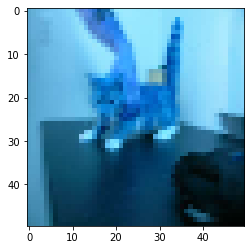

In [52]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [53]:
X = np.array(X_train)
Y = np.array(Y_train)
#X_test = np.array(X_test)

In [55]:
print(X.shape)
print(Y.shape)

(25000, 50, 50, 3)
(25000, 2)


In [62]:
# Parameters

m = X.shape[0]
px = X.shape[1]
learning_rate = 0.01

print("Total image: %d" %m)
print("Pixel size: {}*{}" .format(px,px))
print("Totla channel: %d" %X.shape[3])

Total image: 25000
Pixel size: 50*50
Totla channel: 3


In [64]:
# Flatten the dataset
A0 = X.reshape(X.shape[0], -1).T
nx = A0.shape[0]
print(nx)

7500


In [172]:
def parameter_initialize(layer_dims):
    
    l = len(layer_dims)
    np.random.seed(10)
    
    parameters = {}
    
    for i in range(1, l):
        #print("yes")
        parameters["W"+str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.01
        parameters["b"+str(i)] = np.zeros((layer_dims[i],1))
    
    return parameters

In [173]:
parameter = parameter_initialize([nx, 20, 7,5,1])
print(parameter['W2'].shape)

(7, 20)


In [174]:
def sigmoid_activation(z):
    
    a = 1/(1+np.exp(-z))
    
    return a

In [175]:
def linear_forward(A_prev, W, b):
    print("Shape of W: ", W.shape)
    print("Shape of A_prev: ", A_prev.shape)
    print("Shape of b: ", b.shape)
        
    z = np.dot(W, A_prev) + b
    
    print("Shape of Z: ", z.shape)
    print()
    
    return z

In [176]:
def tanh_activation(z):
    
    a = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    
    return a

In [177]:
A = {}
A["A0"] = A0

print(A["A0"].shape)
print(parameter["W1"].shape)

(7500, 25000)
(20, 7500)


In [178]:
def linear_forward_model(parameter, A, layer_dims=5):
    
    Z = {}
    
    # from layer 1 to l-1
    for i in range(1, layer_dims-1):
        print("\nHidden Layer forward\n")
        A_prev = A["A"+str(i-1)]
        W = parameter["W"+str(i)]
        b = parameter["b"+str(i)]
        
        Z["Z"+str(i)] = linear_forward(A_prev, W,b)
        A["A"+str(i)] = sigmoid_activation(Z["Z"+str(i)])
        
        
    # for layer l
    print("\nOutput Layer Forward\n")
    A_prev = A["A"+str(layer_dims-2)]
    W = parameter["W"+str(layer_dims-1)]
    b = parameter["b"+str(layer_dims-1)]
    
    Z["Z"+str(layer_dims-1)] = linear_forward(A_prev, W,b)
    A["A"+str(layer_dims-1)] = sigmoid_activation(Z["Z"+str(layer_dims-1)])
    
    return Z,A

In [179]:
Z, A = linear_forward_model(parameter, A)


Hidden Layer forward

Shape of W:  (20, 7500)
Shape of A_prev:  (7500, 25000)
Shape of b:  (20, 1)
Shape of Z:  (20, 25000)


Hidden Layer forward

Shape of W:  (7, 20)
Shape of A_prev:  (20, 25000)
Shape of b:  (7, 1)
Shape of Z:  (7, 25000)


Hidden Layer forward

Shape of W:  (5, 7)
Shape of A_prev:  (7, 25000)
Shape of b:  (5, 1)
Shape of Z:  (5, 25000)


Output Layer Forward

Shape of W:  (1, 5)
Shape of A_prev:  (5, 25000)
Shape of b:  (1, 1)
Shape of Z:  (1, 25000)



In [182]:
print(Z["Z4"][0][24000])

-0.017465924780841375


In [22]:
'''Processing the given test data'''
# Almost same as processing the training data but 
# we dont have to label it. 
def process_test_data(): 
    testing_data = [] 
    X_test = []
    Y_test = []
    for img in tqdm(os.listdir(TEST_DIR)): 
        path = os.path.join(TEST_DIR, img) 
        img_num = img.split('.')[0] 
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
        
        #testing_data.append([np.array(img), img_num]) 
        X_test.append(np.array(img))
        Y_test.append(img_num)
          
    shuffle(testing_data) 
    #np.save('test_data.npy', testing_data) 
    return X_test, Y_test

In [ ]:
test_data, X_test, Y_test = process_test_data() 